In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

necessary imports

In [12]:
url = 'https://gist.githubusercontent.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/Mall_Customers.csv'
mall_data = pd.read_csv(url)
mall_data.to_csv('Mall_Customers.csv', index=False)
print("Mall_Customers.csv downloaded successfully.")

Mall_Customers.csv downloaded successfully.


imports the mall_customers csv and then uploads it to the files folder

In [13]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


checks if it is imported correctly

In [14]:
print(mall_data.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


checks for any null values

In [15]:
mall_data['int_gender'] = pd.get_dummies(mall_data['Gender'], drop_first = True, dtype = int)
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),int_gender
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


creates a new column that represents the gender column in numbers

In [16]:
features = mall_data[['int_gender','Age','Annual Income (k$)','Spending Score (1-100)']]
features.head()

,int_gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


creates a dataFrame with all teh features that will be used to determine clusters

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


scales the data so they can be compared evenly

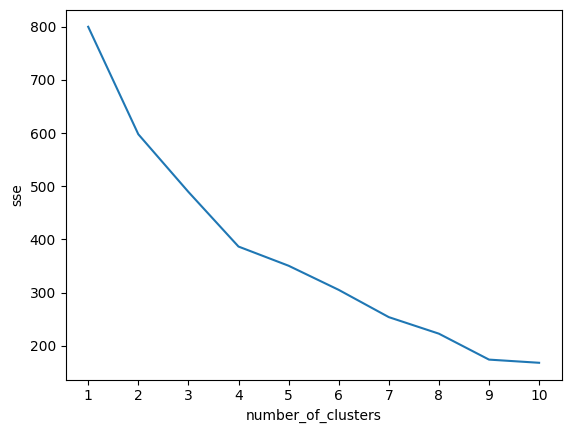

In [18]:
sse = {}
for k in range(1,11):
  k_mean = KMeans(n_clusters=k,max_iter=500).fit(scaled_features)
  sse[k] = k_mean.inertia_
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('number_of_clusters')
plt.ylabel('sse')
plt.xticks(list(sse.keys()))
plt.show()

uses the elbow method to find the ideal number of clusters for the KMeans model and the PCA method

<Axes: >

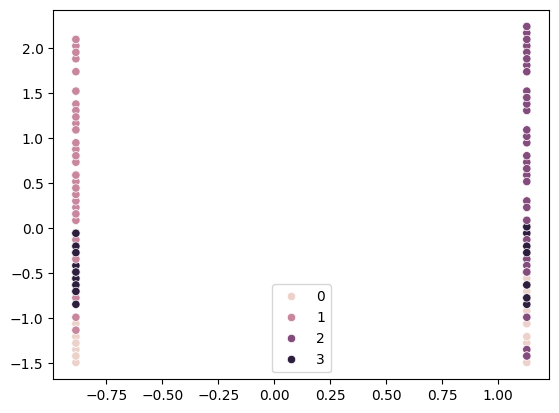

In [19]:
KM_Model = KMeans(n_clusters = 4)
KM_Model = KM_Model.fit_predict(scaled_features)
sns.scatterplot(x = scaled_features[:,0], y = scaled_features[:,1], hue = KM_Model)

trains a K Means model and prints the scatter plot representation of it

<Axes: >

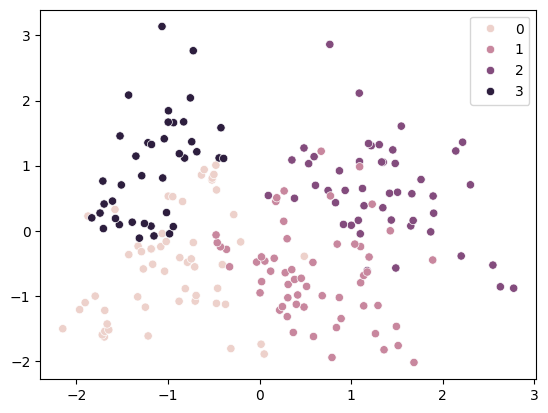

In [20]:
pca_model = PCA(n_components=2)
pca_model = pca_model.fit_transform(scaled_features)
sns.scatterplot(x = pca_model[:,0], y = pca_model[:,1], hue = KM_Model)

trains a PCA model and prints its scatterplot representation

the reason the PCA and KMeans look different is that the KMeans model is a 3d representation of a clustering model so we are seing it from the 3d persepective while the PCA model is able to convert it to a 2d representation so we are able to see the clusters